# Exercise 3. (deadline: 10/1 13:30)

- 문제: 총 30명의 투자자, 그리고 그들의 주식 거래에 대한 기록이 담긴 데이터가 있습니다. 30명의 투자자들을 총투자손익액을 내림차순으로 정렬해, 막대 그래프로 그리세요.

- 데이터(ex3_data.csv) 설명
    - 각 증권거래 계좌의 주식종목별 보유기간을 정리한 데이터
    - columns
        - (1) id: 계좌식별 id
        - (2) code: 보유주식 코드 ('A' + 코드 6자리)
        - (3) buy_date: 매수일
        - (4) hold_days: 주식 보유기간
        
- 유의사항
    - (1) 투자자별 총투자손익액은 다음과 같이 구해진다.
        - 1. 보유종목별 투자손익액을 구한다: 매도일 종가(close price) - 매수일 종가
        - 2. 보유종목별 투자손익액을 합산한다.
    - (2) 보유기간은 **거래일 기준**입니다.
        - 매도일이 2020년 12월 31일을 초과하는 경우에는 2020년 12월 31일에 매도한 것으로 처리합니다.
    - (3) 검색이 되지 않는 주식종목이 존재하는 경우 합산에서 제외합니다. 

# 1. ex3_data.csv불러오기

In [1]:
import pandas as pd

df = pd.read_csv("ex3_data.csv",index_col = 0)
df.head()

,id,code,buy_date,hold_days
0,a0,A049480,20190509,23
1,a0,A051915,20200810,55
2,a0,A056700,20190619,66
3,a1,A217730,20200701,7
4,a1,A222800,20200821,9


# 2. Main

    2.1 설명
        A. 가장 바깥의 for문은 30번 돌아가는데 이는 30명의 투자자의 정보를 각 루프단계에서 처리하기 위함이다
        B. 그 다음 안쪽의 루프는 전체 데이터를 돌면서, 바깥 루프단계에서 정해진 투자자의 정보가 나오면 
            1. 그 투자자가 투자한 종목의 데이터를 가져온다
            -> 여기서 try-except(예외처리)를 이용해 주식 종목이 검색되지 않는 경우를 대비했다
            2. 받아온 데이터의 value들을 int화 시킨다.
            3. 매도일이 20.12.31을 초과하지 않은 경우 해당 매도일 종가로 매도하고, 매도일이 20.12.31일을 초과한 경우
               20.12.31일 종가로 매도하는 if문을 적용한다.
            -> 받아온 data(stock_df)의 index가 주말,휴일을 제외한 거래일만 나타내므로 보유일이 n일이면 n번째 행에 있는 
               종가를 활용해 0번에 행의 매수일 종가와 빼주었다.
            4. 그렇게 해서 나온 종목별 손익액을, 안쪽 for문 밖에 미리 설정한 변수에(aj_total_revenue) 누적해준다.
        C. 마지막으로 해당 투자자의 루프단계를 넘어가기 전에 그 투자자의 id를 index로, 총손익액을 value로 설정해서
           바깥 for문 밖에 미리 만들어둔 revenue_per_person이라는 dataframe에 axis = 0으로 해서 concat한다.
    
    
    

In [2]:
import pandas_datareader.data as web
from datetime import datetime as dt

revenue_per_person = pd.DataFrame()
for j in range(30):                                             #A : 바깥루프
    aj_total_revenue = 0
    for i in range(len(df)):                                    #B : 안쪽 루프
        if df['id'][i] == 'a'+str(j):                           #바깥 루프 단계에서 정해진 투자자 정보가 나오면
            try:                                                #B-1 : 투자종목 불러오기(예외처리)
                stock_df = web.DataReader(df['code'][i][1:],'naver',start=str(df['buy_date'][i]), end="2020-12-31")
            except:
                continue
                
            for col in stock_df.columns : stock_df[col]=stock_df[col].apply(int)      #B-2 : value의 int화
                
            if stock_df.index[int(df['hold_days'][i])] <= dt(2020,12,31):             #B-3 : 20.12.31 초과 시 IF문 처리(거래일 기준)
                revenue = stock_df['Close'][int(df['hold_days'][i])] - stock_df['Close'][0]
            else : 
                revenue = stock_df['Close'][-1] - stock_df['Close'][0]            
            
            aj_total_revenue += revenue                                               #B-4 : 해당 투자자의 종목별 손익 합계
    
    aj_series = pd.Series([aj_total_revenue], index = ['a'+str(j)])
    revenue_per_person = pd.concat([revenue_per_person,aj_series],axis = 0)           #C : 투자자별 총투자손익액 담기(revenue_per_person)

revenue_per_person.columns = ["revenue"]                                              
print(revenue_per_person)
      

      revenue
a0  -106620.0
a1    73150.0
a2   -52360.0
a3      -90.0
a4   -38622.0
a5   160401.0
a6  -244441.0
a7   163859.0
a8    54889.0
a9    85697.0
a10   84608.0
a11  218999.0
a12   42055.0
a13  135963.0
a14   15910.0
a15   87782.0
a16   42390.0
a17   88110.0
a18   24300.0
a19   -8163.0
a20   78757.0
a21   36900.0
a22  102622.0
a23  458807.0
a24     700.0
a25   42707.0
a26   40336.0
a27   79380.0
a28  253032.0
a29  -35751.0


# 3. 내림차순 정렬

In [3]:
revenue_per_person = revenue_per_person.sort_values(by = 'revenue', ascending = False)
print(revenue_per_person) 

      revenue
a23  458807.0
a28  253032.0
a11  218999.0
a7   163859.0
a5   160401.0
a13  135963.0
a22  102622.0
a17   88110.0
a15   87782.0
a9    85697.0
a10   84608.0
a27   79380.0
a20   78757.0
a1    73150.0
a8    54889.0
a25   42707.0
a16   42390.0
a12   42055.0
a26   40336.0
a21   36900.0
a18   24300.0
a14   15910.0
a24     700.0
a3      -90.0
a19   -8163.0
a29  -35751.0
a4   -38622.0
a2   -52360.0
a0  -106620.0
a6  -244441.0


# 4. 막대그래프 그리기

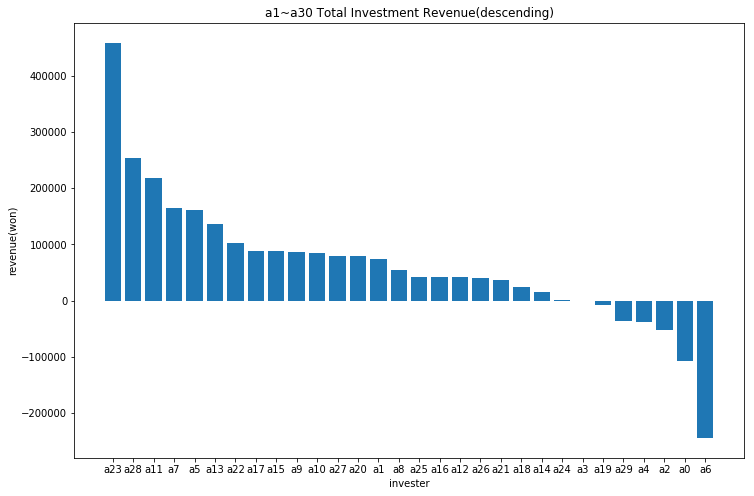

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(12,8))
plt.bar(x = revenue_per_person['revenue'].index , height = revenue_per_person['revenue'])
plt.xlabel('invester')
plt.ylabel('revenue(won)')
plt.title('a1~a30 Total Investment Revenue(descending)')
plt.show()

